## 1. Data selection, reasons, and problem definition

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
#https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

percent = 0.1 #샘플 비율 지정

df_audi = pd.read_csv("audi.csv")
df_audi = df_audi.sample(round(len(df_audi)*percent))
df_bmw = pd.read_csv("audi.csv")
df_bmw = df_bmw.sample(round(len(df_bmw)*percent))
df_cclass = pd.read_csv("cclass.csv")
df_cclass = df_cclass.sample(round(len(df_cclass)*percent))
df_focus = pd.read_csv("focus.csv")
df_focus = df_focus.sample(round(len(df_focus)*percent))
df_ford = pd.read_csv("ford.csv")
df_ford = df_ford.sample(round(len(df_ford)*percent))
df_hyundai = pd.read_csv("hyundai.csv")
df_hyundai = df_hyundai.sample(round(len(df_hyundai)*percent))
df_hyundai = df_hyundai.rename(columns={"tax(£)":"tax"}) #칼럼명 변경

df_merc = pd.read_csv("merc.csv")
df_merc = df_merc.sample(round(len(df_merc)*percent))
df_skoda = pd.read_csv("skoda.csv")
df_skoda = df_skoda.sample(round(len(df_skoda)*percent))
df_toyota = pd.read_csv("toyota.csv")
df_toyota = df_toyota.sample(round(len(df_toyota)*percent))
df_vauxhall = pd.read_csv("vauxhall.csv")
df_vauxhall = df_vauxhall.sample(round(len(df_vauxhall)*percent))
df_vw = pd.read_csv("vw.csv")
df_vw = df_vw.sample(round(len(df_vw)*percent))

#데이터 하나로 합치기
df_list = [df_audi, df_bmw, df_cclass, df_focus, df_ford, df_hyundai, df_merc, df_skoda, df_toyota, df_vauxhall, df_vw]
df = pd.concat(df_list, ignore_index=True)

print(df.shape)
df.sample(10)

(10843, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4676,Kuga,2017,15300,Manual,24477,Diesel,125.000,60.100,2.000
6403,GLA Class,2016,17495,Semi-Auto,44499,Diesel,125.000,56.500,2.100
8934,Corsa,2016,6895,Manual,22000,Petrol,30.000,55.400,1.400
3502,Fiesta,2015,6989,Manual,48612,Petrol,0.000,65.700,1.000
7034,Fabia,2017,7600,Manual,10610,Petrol,145.000,57.700,1.000
6473,GLA Class,2015,15800,Automatic,34250,Diesel,125.000,55.400,2.100
9428,Polo,2016,13495,Semi-Auto,34558,Petrol,125.000,50.400,1.800
4433,B-MAX,2018,9000,Manual,31894,Petrol,145.000,55.400,1.000
2164,C Class,2017,21400,Automatic,26000,Diesel,NaN,NaN,2.100
1583,A3,2019,20990,Manual,4000,Diesel,150.000,51.400,1.600


In [3]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10843.000,10843.000,10843.000,9908.000,9908.000,10843.000
mean,2017.079,16838.015,23135.193,119.389,54.422,1.631
std,2.149,9693.365,21173.881,63.495,12.740,0.531
min,1995.000,950.000,1.000,0.000,1.100,0.000
25%,2016.000,10174.000,7613.500,125.000,45.600,1.200
50%,2017.000,14599.000,17774.000,145.000,54.300,1.500
75%,2019.000,20950.000,32400.500,145.000,62.800,2.000
max,2020.000,159999.000,300000.000,580.000,235.400,6.300


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10843 entries, 0 to 10842
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10843 non-null  object 
 1   year          10843 non-null  int64  
 2   price         10843 non-null  int64  
 3   transmission  10843 non-null  object 
 4   mileage       10843 non-null  int64  
 5   fuelType      10843 non-null  object 
 6   tax           9908 non-null   float64
 7   mpg           9908 non-null   float64
 8   engineSize    10843 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 762.5+ KB


In [6]:
#delete column"tax"
df = df.drop(["tax"], axis = 1)

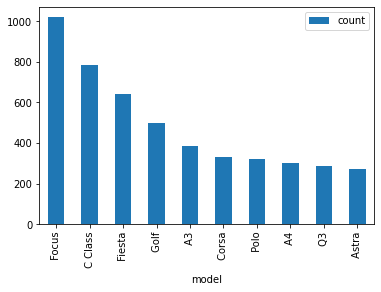

          count
model          
 Focus     1020
 C Class    787
 Fiesta     640
 Golf       499
 A3         388
 Corsa      330
 Polo       324
 A4         302
 Q3         286
 Astra      270


Index([' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' A4', ' Q3', ' Astra'],
      dtype='object', name='model')

In [7]:
#Check Trend: top10 sold out models
import matplotlib.pyplot as plt

models = pd.DataFrame(df.groupby("model")["model"].count())
models.columns = ["count"]
models.sort_values(by=["count"], inplace=True, ascending=False)
models = models.head(10)
models.plot.bar()
plt.show()
print(models)
models.index

          count  avg_price
model                     
 Focus     1020  13204.564
 C Class    787  23330.996
 Fiesta     640  10094.069
 Golf       499  16619.425
 A3         388  17928.345
 Corsa      330   8338.476
 Polo       324  11055.157
 A4         302  20327.430
 Q3         286  22947.769
 Astra      270  10217.563
15406.379469636177


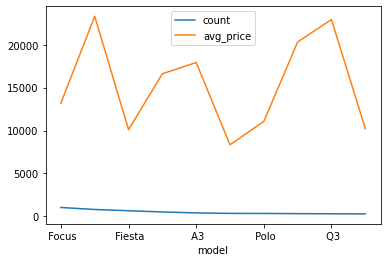

In [8]:
#top10 best selling cars avg price
models_avg_price = df.groupby("model")["price"].mean()
models_avg_price[[' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4']]
models['avg_price'] = models_avg_price
models.plot.line()
print(models)
print(models["avg_price"].mean())

In [9]:
#top10 best selling cars avg year
models_avg_year = df.groupby("model")["year"].mean()
models_avg_year[[' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4']]
models['avg_year'] = models_avg_year
print(models)
print(models["avg_year"].mean())

          count  avg_price  avg_year
model                               
 Focus     1020  13204.564  2016.967
 C Class    787  23330.996  2017.342
 Fiesta     640  10094.069  2016.678
 Golf       499  16619.425  2016.938
 A3         388  17928.345  2016.948
 Corsa      330   8338.476  2016.852
 Polo       324  11055.157  2016.769
 A4         302  20327.430  2017.103
 Q3         286  22947.769  2017.339
 Astra      270  10217.563  2016.726
2016.9660694788363


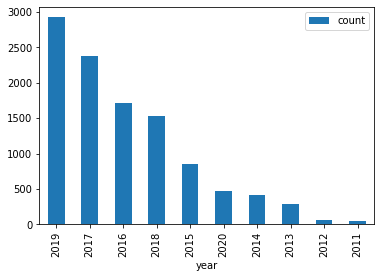

      count
year       
2019   2926
2017   2374
2016   1715
2018   1528
2015    856
2020    471
2014    422
2013    282
2012     65
2011     45


In [10]:
#Check Trend: top10 sold out years

years = pd.DataFrame(df.groupby("year")["year"].count())
years.columns = ["count"]
years.sort_values(by=["count"], inplace=True, ascending=False)
years = years.head(10)
years.plot.bar()
plt.show()
print(years)

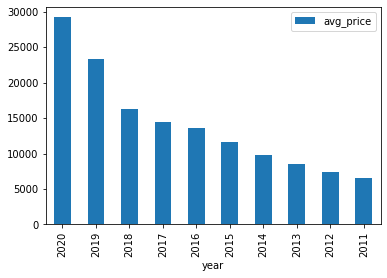

      avg_price
year           
2020  29203.552
2019  23389.527
2018  16301.857
2017  14442.618
2016  13549.008
2015  11657.697
2014   9848.763
2013   8574.823
2012   7434.385
2011   6591.422


In [11]:
#Check Trend: top10 years average price

years_price = pd.DataFrame(df.groupby("year")["price"].mean())
years_price.columns = ["avg_price"]
years_price.sort_values(by=["avg_price"], inplace=True, ascending=False)
years_price = years_price.head(10)
years_price.plot.bar()
plt.show()
print(years_price)

In [12]:
#Check how many 1970 & 1998 cars were sold

condition = (df["year"] == 1970) | (df["year"] == 1998)
df[condition]

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
961,A3,1998,4999,Automatic,55000,Petrol,30.400,1.800


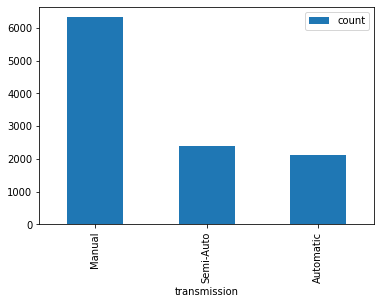

              count
transmission       
Manual         6323
Semi-Auto      2396
Automatic      2124


In [13]:
#Check transmissions
transmission = pd.DataFrame(df.groupby(["transmission"])["transmission"].count())
transmission.columns = ["count"]
transmission.sort_values(by=["count"], inplace=True, ascending=False)
transmission.plot.bar()
plt.show()
print(transmission)

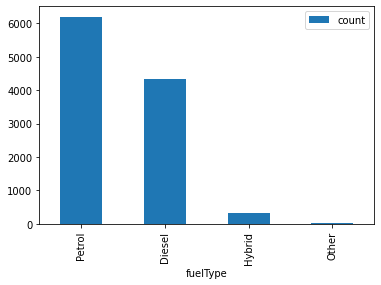

      avg_price
year           
2020  29203.552
2019  23389.527
2018  16301.857
2017  14442.618
2016  13549.008
2015  11657.697
2014   9848.763
2013   8574.823
2012   7434.385
2011   6591.422


In [14]:
#Check fuelType

fuelType = pd.DataFrame(df.groupby("fuelType")["fuelType"].count())
fuelType.columns = ["count"]
fuelType.sort_values(by=["count"], inplace=True, ascending=False)
fuelType.plot.bar()
plt.show()
print(years_price)

In [15]:
#Now we can see
#Years: 15-19 Popular
#Model: Focus / C Class / Fiesta / Golf / A3      
#Transmission: manual
#feul type: Petrol / diessel


## 2. Data preprocessing, EDA, and visualization

14

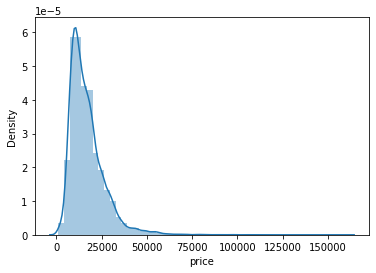

In [16]:
#Check "price" Outliers
sns.distplot(df['price'], kde=True, rug=False)
condition = (df["price"] >75000)
df[condition]["price"].count()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize


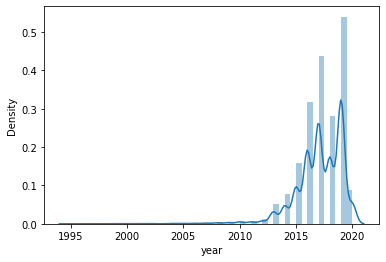

In [17]:
#Check "year" Outliers
sns.distplot(df['year'], kde=True, rug=False)
condition = (df["year"] >2020) | (df["year"] <1990)
df[condition]

7

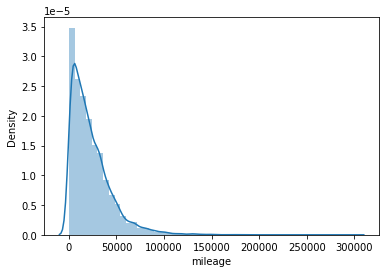

In [18]:
#Check "mileage" Outliers
sns.distplot(df['mileage'], kde=True, rug=False)
condition = (df["mileage"] >150000)
df[condition]["model"].count()

In [19]:
#Delete Outliers
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) &
        (df['mileage'] >= np.percentile(df['mileage'], 0.5)) & 
        (df['mileage'] <= np.percentile(df['mileage'], 99.5)) &
        (df['year'] >= np.percentile(df['year'], 0.5)) & 
        (df['year'] <= np.percentile(df['year'], 99.5))]

In [20]:
#fill null values with average of mpg
df = df.fillna(df.mean())

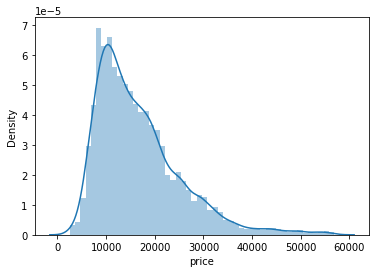

In [21]:
sns.distplot(df['price'], kde=True, rug=False)

22421.619476498734


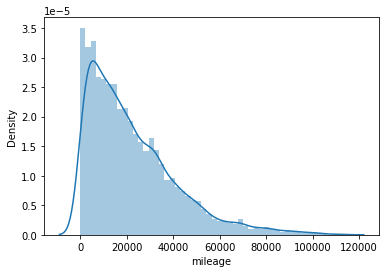

In [22]:
print(df['mileage'].mean())
sns.distplot(df['mileage'], kde=True, rug=False)

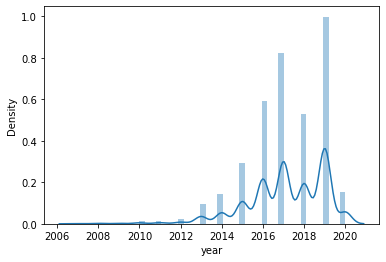

In [23]:
sns.distplot(df['year'], kde=True, rug=False)

In [24]:
# sns.distplot(df[(df['year']>2015)]['mileage'], kde=True, rug=False)

In [25]:
# sns.distplot(df[(df['year']>2009)&(df['year']<2015)]['mileage'], kde=True, rug=False)

In [26]:
# sns.distplot(df[(df['price']<=16500)]['mileage'], kde=True, rug=True)

In [27]:
# sns.distplot(df[(df['price']>16500)]['mileage'], kde=True, rug=True)

In [28]:
# sns.distplot(df[(df['price']>16500)&(df['mileage']<10000)]['year'], kde=True, rug=True)

In [29]:
# sns.distplot(df[(df['price']<=16500)]['year'], kde=True, rug=True)

## 3. Modeling and model analysis

In [30]:
## train set, validation set, test set
from sklearn.model_selection import train_test_split

X = df.drop(columns="price")
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=None)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5968, 7)
y_train shape:  (5968,)
X_val shape:  (2559, 7)
y_val shape:  (2559,)
X_test shape:  (2132, 7)
y_test shape:  (2132,)


#### 3-0. Baseline Model

mean:  16666.44375644995
median:  14695.0


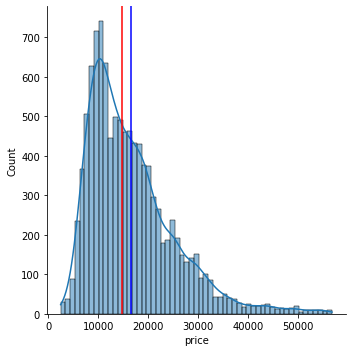

In [31]:
#Baseline Graph
price_mean = y_train.mean()

## SalePrice probability density function
sns.displot(df['price'], kde=True)

## draw mean value and median value on the graph
plt.axvline(df['price'].mean(), color='blue')
plt.axvline(df['price'].median(), color='red');
print("mean: ", df['price'].mean())
print("median: ", df['price'].median())

In [32]:
# Get baseline model error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

price_mean = y_train.mean()
y_pred_baseline = [price_mean] * len(y_val)

mse = mean_squared_error(y_val, y_pred_baseline)
mae = mean_absolute_error(y_val, y_pred_baseline)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_baseline)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,72858643.662
1,MAE,6630.316
2,RMSE,8535.727
3,R2,-0.000


#### 3-1. Multiple Linear Regression

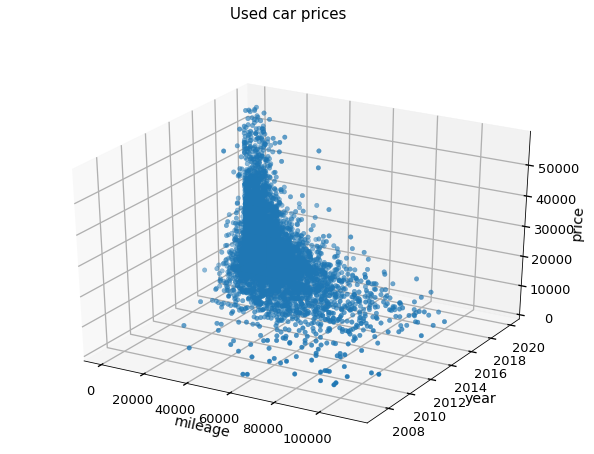

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

# for 3d plot
ax = fig.gca(projection='3d')

ax.scatter(X_train['mileage'], X_train['year'], y_train)
ax.set_xlabel('mileage', labelpad=10)
ax.set_ylabel('year', labelpad=10)
ax.set_zlabel('price', labelpad=10)

plt.suptitle('Used car prices', fontsize=15)
plt.show()

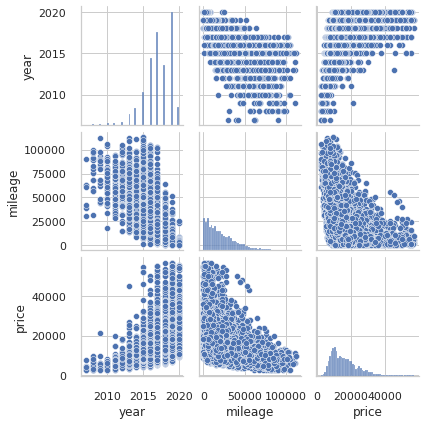

In [34]:
# Compare 3 important features: year, mileage, and price
sns.set(style='whitegrid', context='notebook')
cols = ['year', 'mileage','price']
sns.pairplot(df[cols], height=2);

In [35]:
# Make multiple_linear_model
from sklearn.linear_model import LinearRegression

multiple_linear_model = LinearRegression()

# Select features
features = ["mileage", "year"]

X_train_mlinear = X_train[features]
X_val_mlinear = X_val[features]

# fit into multiple_linear_model
multiple_linear_model.fit(X_train_mlinear, y_train)

# validation set
y_pred_val_linear = multiple_linear_model.predict(X_val_mlinear)

# 1. multiple linear regression error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, y_pred_val_linear)
mae = mean_absolute_error(y_val, y_pred_val_linear)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_linear)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

## Coefficient or parameters
b0 = multiple_linear_model.intercept_
b1, b2 = multiple_linear_model.coef_

print(f'y = {b0:.0f} + {b1:.4f}x\u2081 + {b2:.4f}x\u2082')
#"mileage" dose not matter to the slope

,Metric,Score
0,MSE,51522229.277
1,MAE,5483.924
2,RMSE,7177.899
3,R2,0.293


y = -4190215 + -0.0523x₁ + 2086.1530x₂


y = 21348.8 + -0.207x₁


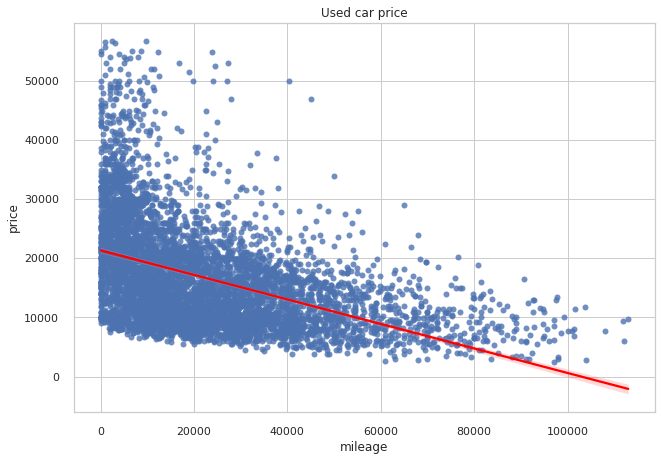

In [36]:
#Make linear regression for checking coefficient about mileage and price
import seaborn as sns
import numpy as np

linear_model = LinearRegression()
X_train_linear = X_train[["mileage"]]
linear_model.fit(X_train_linear, y_train)

## Coefficient or parameters
b0 = linear_model.intercept_
b1 = float(linear_model.coef_)

print(f'y = {b0:.1f} + {b1:.3f}x\u2081')

sns.regplot(x=X_train_linear, y=y_train, line_kws={"color": "red"}).set_title('Used car price');

In [37]:
X_train.head(3)

,model,year,transmission,mileage,fuelType,mpg,engineSize
9241,Astra,2017,Manual,17749,Petrol,64.200,1.000
469,Q3,2016,Semi-Auto,31600,Diesel,50.400,2.000
10580,Golf,2015,Manual,58275,Diesel,68.900,2.000


In [38]:
#categorical type checking
print("model: ",len(X_train.groupby("model")))
print("transmission: ",len(X_train.groupby("transmission")))
print("fuelType: ",len(X_train.groupby("fuelType")))

model:  135
transmission:  3
fuelType:  4


In [39]:
# ordinal encoder and standard scaler
!pip install category_encoders

# from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

## 원핫 인코딩
# encoder = OneHotEncoder(use_cat_names = True)
ord_enc = OrdinalEncoder(handle_missing="value")
scaler = StandardScaler()

X_train_ord_enc = ord_enc.fit_transform(X_train)
X_val_ord_enc = ord_enc.transform(X_val)
X_test_ord_enc = ord_enc.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_ord_enc)
X_val_scaled = scaler.transform(X_val_ord_enc)
X_test_scaled = scaler.transform(X_test_ord_enc)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.0 MB/s 


In [40]:
X_train_ord_enc.head(3)

,model,year,transmission,mileage,fuelType,mpg,engineSize
9241,1,2017,1,17749,1,64.200,1.000
469,2,2016,2,31600,2,50.400,2.000
10580,3,2015,1,58275,2,68.900,2.000


1 features
Selected names:  Index(['engineSize'], dtype='object')
Test MAE: $5,371
Test R2: 0.3609467434759097 

2 features
Selected names:  Index(['year', 'engineSize'], dtype='object')
Test MAE: $3,581
Test R2: 0.6977817484898319 

3 features
Selected names:  Index(['year', 'transmission', 'engineSize'], dtype='object')
Test MAE: $3,425
Test R2: 0.7211243614613085 

4 features
Selected names:  Index(['year', 'transmission', 'mileage', 'engineSize'], dtype='object')
Test MAE: $3,276
Test R2: 0.7415517126538533 

5 features
Selected names:  Index(['year', 'transmission', 'mileage', 'mpg', 'engineSize'], dtype='object')
Test MAE: $3,205
Test R2: 0.7405936844068601 

6 features
Selected names:  Index(['year', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize'], dtype='object')
Test MAE: $3,206
Test R2: 0.7405316349073802 

7 features
Selected names:  Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')
Test MAE: $3,207


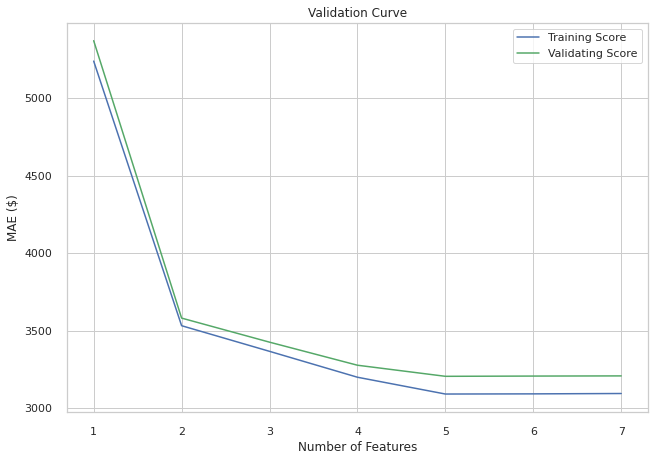

In [41]:
# features를 몇 개 선책하는 것이 좋은지 알아 봅시다.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import f_regression, SelectKBest

training = []
testing = []
ks = range(1, len(X_train_ord_enc.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train_ord_enc.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train_ord_enc, y_train)
    X_val_selected = selector.transform(X_val_ord_enc)
    
    all_names = X_train_ord_enc.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)
    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_val_selected)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label= "Validating Score", color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

In [42]:
# Tunning hyperparameters and features for Multiple_linear_model

# Select features
features = ['engineSize', 'transmission', 'year']

X_train_mlinear_new = X_train_ord_enc[features]
X_val_mlinear_new = X_val_ord_enc[features]

# fit into multiple_linear_model
multiple_linear_model.fit(X_train_mlinear_new, y_train)

# validation set
y_pred_val_mlinear_new = multiple_linear_model.predict(X_val_mlinear_new)

# 1. multiple linear regression error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, y_pred_val_mlinear_new)
mae = mean_absolute_error(y_val, y_pred_val_mlinear_new)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_mlinear_new)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

## Coefficient or parameters
b0 = multiple_linear_model.intercept_
b1, b2, b3 = multiple_linear_model.coef_

print(f'y = {b0:.0f} + {b1:.4f}x\u2081 + {b2:.4f}x\u2082 + {b3:.4f}x\u2083')
#"mileage" dose not matter to the slope

,Metric,Score
0,MSE,20309935.858
1,MAE,3425.152
2,RMSE,4506.655
3,R2,0.721


y = -4964819 + 9843.0265x₁ + 1998.4829x₂ + 2460.0586x₃


#### 3-2. Ridge Regression

Ridge Regression, alpha=0.001
Validation MAE: $3,207
Validation R2: 0.741


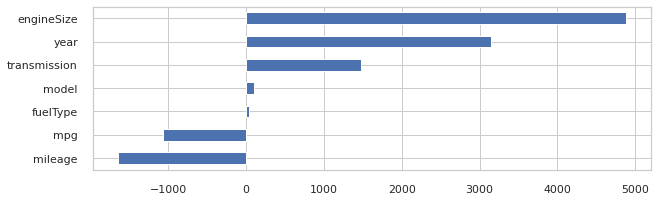

Ridge Regression, alpha=0.005
Validation MAE: $3,207
Validation R2: 0.741


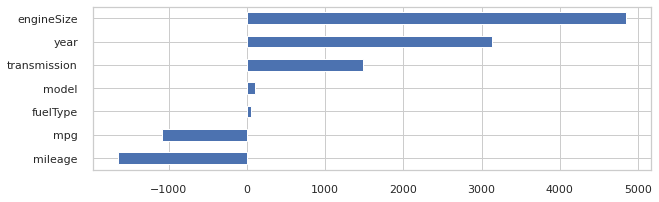

Ridge Regression, alpha=0.01
Validation MAE: $3,206
Validation R2: 0.741


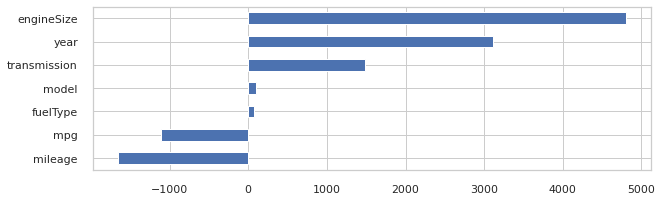

Ridge Regression, alpha=0.02
Validation MAE: $3,205
Validation R2: 0.741


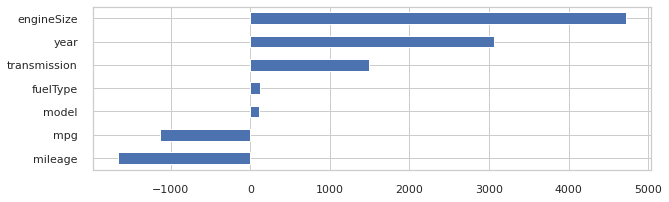

Ridge Regression, alpha=0.03
Validation MAE: $3,203
Validation R2: 0.741


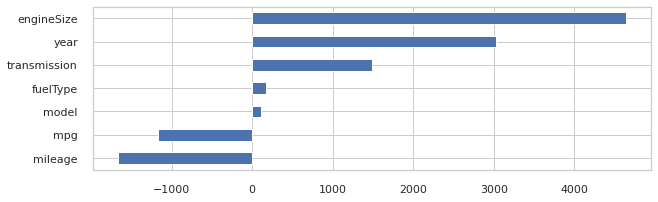

Ridge Regression, alpha=0.05
Validation MAE: $3,202
Validation R2: 0.740


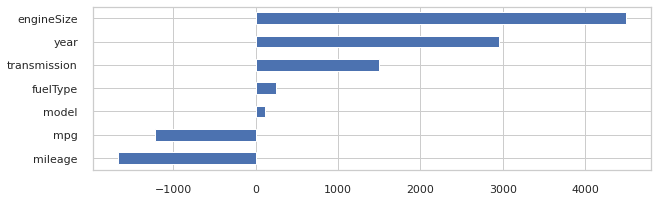

Ridge Regression, alpha=0.07
Validation MAE: $3,202
Validation R2: 0.740


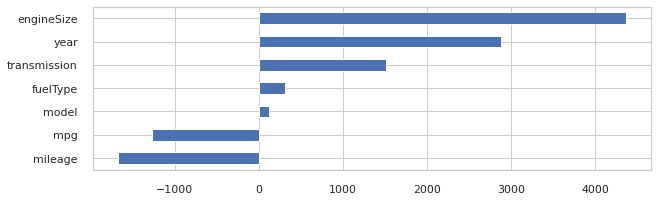

Ridge Regression, alpha=1.0
Validation MAE: $3,668
Validation R2: 0.650


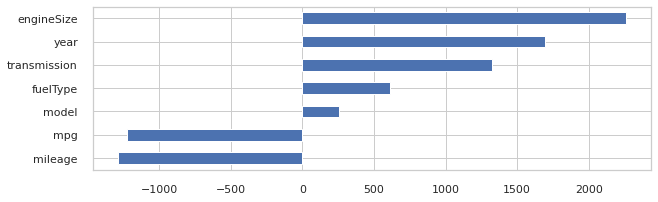

Ridge Regression, alpha=10.0
Validation MAE: $5,806
Validation R2: 0.220


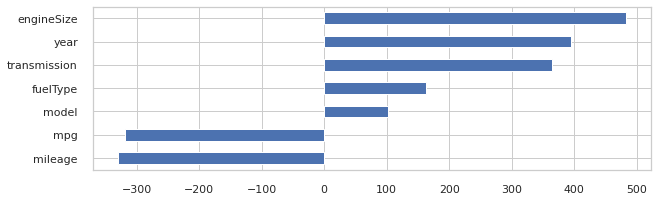

In [43]:
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

for alpha in [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 1.0, 10.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    Ridge_model = Ridge(alpha=alpha, normalize=True)  
    Ridge_model.fit(X_train_scaled, y_train)
    y_pred = Ridge_model.predict(X_val_scaled)

    # MAE for test
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    print(f'Validation MAE: ${mae:,.0f}')
    print(f'Validation R2: {r2:,.3f}')
    
    # plot coefficients
    coefficients = pd.Series(Ridge_model.coef_, X_train.columns)
    plt.figure(figsize=(10,3))
    coefficients.sort_values().plot.barh()
    plt.show()


In [44]:
#Best Ridge Model
Ridge_model = Ridge(alpha=0.05, normalize=True)  
Ridge_model.fit(X_train_scaled, y_train)
y_pred_val_Ridge = Ridge_model.predict(X_val_scaled)

mse = mean_squared_error(y_val, y_pred_val_Ridge)
mae = mean_absolute_error(y_val, y_pred_val_Ridge)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_Ridge)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,18911367.498
1,MAE,3202.380
2,RMSE,4348.720
3,R2,0.740


#### 3-3. Random Forest

In [45]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
    OrdinalEncoder(handle_missing="value"), 
    SimpleImputer(), 
    RandomForestRegressor(n_estimators=10, random_state=None, n_jobs=-1)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.9029786305086724


In [46]:
# Check feature importances
# 랜덤포레스트에서는 학습 후에 특성들의 중요도 정보(Gini importance)를 기본으로 제공합니다. 
# 중요도는 노드들의 지니불순도(Gini impurity)를 가지고 계산하는데, 노드가 중요할 수록 불순도가 크게 감소한다는 사실을 이용합니다.
# 노드는 한 특성의 값을 기준으로 분리가 되기 때문에 불순도를 크게 감소하는데 많이 사용된 특성이 중요도가 올라갈 것입니다.

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from category_encoders import OrdinalEncoder
from category_encoders import TargetEncoder
from scipy.stats import randint, uniform

pipe = make_pipeline(
    # TargetEncoder(), 
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=None)
)

dists = {
    # 'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    # 'targetencoder__min_samples_leaf': randint(1, 10),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=20, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [48]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.44130316605084674, 'randomforestregressor__n_estimators': 351, 'simpleimputer__strategy': 'median'}
MAE:  1730.554610422154


In [49]:
# 만들어진 모델에서 가장 성능이 좋은 모델을 불러옵니다.
pipe = clf.best_estimator_

from sklearn.metrics import mean_absolute_error

y_pred_val_rf = pipe.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val_rf)
mae = mean_absolute_error(y_val, y_pred_val_rf)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_rf)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,6002516.313
1,MAE,1625.792
2,RMSE,2450.003
3,R2,0.918


#### 3-4. Permutation importance, pdp, shap

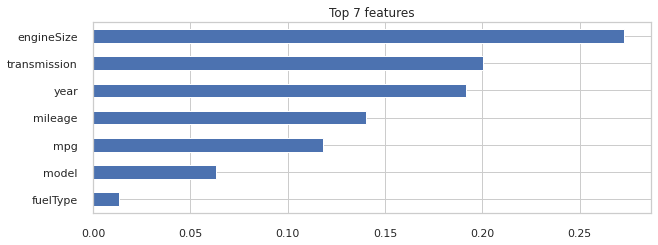

In [50]:
# Feature Importances(Mean decrease impurity, MDI)

# sklearn 트리 기반 분류기에서 디폴트로 사용되는 특성 중요도는 속도는 빠르지만 결과를 주의해서 봐야 합니다. 
# 각각 특성을 모든 트리에 대해 평균불순도감소(mean decrease impurity)를 계산한 값입니다.

rf = pipe.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 7
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [52]:
# Permutation Importance, Mean Decrease Accuracy,MDA
!pip install eli5
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline
import eli5
from eli5.sklearn import PermutationImportance

# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=2, n_jobs=-1)) 
])

pipe.fit(X_train, y_train)

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='neg_mean_absolute_error', # regressor
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.1 MB/s 
     |████████████████████████████████| 133 kB 15.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=c68b96be3af4a56fcb4a363a760bb4181e6b14488ae0065b91a5c2c51a9a71e7
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [53]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending = False)

engineSize     3101.052
year           2326.882
transmission   1137.384
model           981.086
mileage         808.876
mpg             774.648
fuelType         53.761
dtype: float64

In [54]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
3101.0523 ± 146.2637,engineSize
2326.8815 ± 75.7585,year
1137.3844 ± 58.6059,transmission
981.0864 ± 27.8591,model
808.8765 ± 21.3469,mileage
774.6477 ± 20.1738,mpg
53.7609 ± 9.5552,fuelType


In [55]:
X_train_transformed = pipe.named_steps['preprocessing'].transform(X_train)
model_final = pipe.named_steps['rf'].fit(X_train_transformed,y_train)

In [56]:
#transformed train data convert to Dataframe
X_train_transformed_df = pd.DataFrame(X_train_transformed)
X_train_transformed_df.columns = X_train.columns
X_train_transformed_df.head()

,model,year,transmission,mileage,fuelType,mpg,engineSize
0,1.000,2017.000,1.000,17749.000,1.000,64.200,1.000
1,2.000,2016.000,2.000,31600.000,2.000,50.400,2.000
2,3.000,2015.000,1.000,58275.000,2.000,68.900,2.000
3,4.000,2015.000,2.000,32786.000,2.000,54.638,2.100
4,5.000,2017.000,1.000,8600.000,1.000,54.638,1.000


In [57]:
!pip install shap
!pip install pdpbox

example1 = X_train_transformed_df.iloc[[10]]

# predict example1
model_final.predict(example1)

import shap
explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(example1)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=example1
)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 1.4 MB/s 
     |████████████████████████████████| 13.1 MB 26.9 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=cc515cad6dfe3082f697415cc726bab617656b418ae81d13987c7c7bab03b792
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

In [58]:
example2 = X_train_transformed_df.iloc[[100]]

# predict example1
model_final.predict(example2)

import shap
explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(example2)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=example2
)

In [59]:
example3 = X_train_transformed_df.iloc[[1000]]

# predict example1
model_final.predict(example3)

import shap
explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(example3)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=example3
)

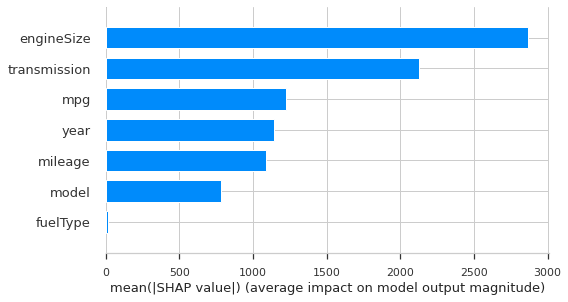

In [60]:
shap.summary_plot(shap_values, X_train_transformed_df.iloc[:10000], plot_type="bar")

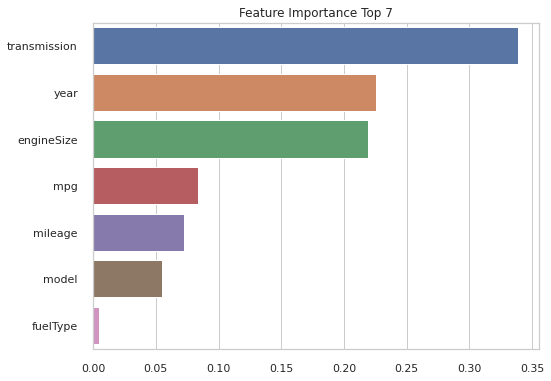

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 배열형태로 반환
ft_importance_values = model_final.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top7 = ft_series.sort_values(ascending=False)[:7]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 7')
sns.barplot(x=ft_top7, y=ft_top7.index)
plt.show()

In [62]:
# eliminate "fuelType" and rebuild the model
def feature_engineering(data):
  data = data.drop(columns=["fuelType"])
  return data

X_train = feature_engineering(X_train)
X_val = feature_engineering(X_val)
X_test = feature_engineering(X_test)

In [63]:
#New Random Forest Model
pipe = make_pipeline(
    TargetEncoder(), 
    # OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=None)
)

dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=40, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [64]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 15, 'randomforestregressor__max_features': 0.6066985546639917, 'randomforestregressor__n_estimators': 489, 'simpleimputer__strategy': 'mean', 'targetencoder__min_samples_leaf': 3, 'targetencoder__smoothing': 500.0}
MAE:  1441.8716228597798


In [65]:
# 만들어진 모델에서 가장 성능이 좋은 모델을 불러옵니다.
pipe = clf.best_estimator_

from sklearn.metrics import mean_absolute_error

y_pred_val_rf = pipe.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val_rf)
mae = mean_absolute_error(y_val, y_pred_val_rf)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_rf)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,4446231.014
1,MAE,1338.616
2,RMSE,2108.609
3,R2,0.939


#### 3-5. Test Model and Analysis

In [66]:
#Test the baseline model

# ordinal encoder
ord_enc = OrdinalEncoder(handle_missing="value")
ord_enc.fit_transform(X_train)
X_test_ord_enc = ord_enc.transform(X_test)

# Select features
features = ['engineSize', 'transmission', 'year']
X_test_baseline = X_test_ord_enc[features]

# test set
y_pred_test_baseline = multiple_linear_model.predict(X_test_baseline)

mse = mean_squared_error(y_test, y_pred_test_baseline)
mae = mean_absolute_error(y_test, y_pred_test_baseline)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_test_baseline)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,20464017.367
1,MAE,3350.973
2,RMSE,4523.717
3,R2,0.723


In [67]:
#Test the final model

y_pred_test_final = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test_final)
mae = mean_absolute_error(y_test, y_pred_test_final)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_test_final)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,4880129.045
1,MAE,1414.011
2,RMSE,2209.101
3,R2,0.934


In [68]:
#Check Error Rate
df_table = pd.DataFrame({"y_test":y_test,"baseline_model":y_pred_test_baseline, "base_error(%)":None,"final_model":y_pred_test_final, "final_error(%)":None})

df_table["base_error(%)"] = (abs(df_table["y_test"] - df_table["baseline_model"])/df_table["y_test"])*100
df_table["final_error(%)"] = (abs(df_table["y_test"] - df_table["final_model"])/df_table["y_test"])*100

df_table.head()

,y_test,baseline_model,base_error(%),final_model,final_error(%)
8419,9990,17817.836,78.357,10299.537,3.098
1299,37990,27720.618,27.032,36171.863,4.786
8817,11790,16894.685,43.297,12872.570,9.182
2487,16710,16866.203,0.935,14322.328,14.289
2093,44888,10494.624,76.620,27056.237,39.725


In [69]:
#Comparision between baseline model and final model
df_analysis = pd.DataFrame({"error(%)":[1,5,10,20,30,"sum"], "baseline_model":[1,2,3,4,5,0], "final_model":[0,0,0,0,0,0]})
df_analysis.set_index("error(%)", inplace = True)

total_size = len(df_table)
df_analysis.iloc[0,0] = (df_table[df_table["base_error(%)"]<=1]["base_error(%)"].count())/total_size*100
df_analysis.iloc[0,1] = (df_table[df_table["final_error(%)"]<=1]["final_error(%)"].count())/total_size*100

df_analysis.iloc[1,0] = (df_table[(df_table["base_error(%)"]>1)&(df_table["base_error(%)"]<=5)]["base_error(%)"].count())/total_size*100
df_analysis.iloc[1,1] = (df_table[(df_table["final_error(%)"]>1)&(df_table["final_error(%)"]<=5)]["final_error(%)"].count())/total_size*100

df_analysis.iloc[2,0] = (df_table[(df_table["base_error(%)"]>5)&(df_table["base_error(%)"]<=10)]["base_error(%)"].count())/total_size*100
df_analysis.iloc[2,1] = (df_table[(df_table["final_error(%)"]>5)&(df_table["final_error(%)"]<=10)]["final_error(%)"].count())/total_size*100

df_analysis.iloc[3,0] = (df_table[(df_table["base_error(%)"]>10)&(df_table["base_error(%)"]<=20)]["base_error(%)"].count())/total_size*100
df_analysis.iloc[3,1] = (df_table[(df_table["final_error(%)"]>10)&(df_table["final_error(%)"]<=20)]["final_error(%)"].count())/total_size*100

df_analysis.iloc[4,0] = (df_table[(df_table["base_error(%)"]>20)&(df_table["base_error(%)"]<=30)]["base_error(%)"].count())/total_size*100
df_analysis.iloc[4,1] = (df_table[(df_table["final_error(%)"]>20)&(df_table["final_error(%)"]<=30)]["final_error(%)"].count())/total_size*100

df_analysis.iloc[5,0] = df_analysis.iloc[:5,0].sum()
df_analysis.iloc[5,1] = df_analysis.iloc[:5,1].sum()

df_analysis

,baseline_model,final_model
error(%),,
1,4.315,8.865
5,10.319,31.707
10,14.869,26.689
20,26.313,25.235
30,18.621,5.394
sum,74.437,97.889


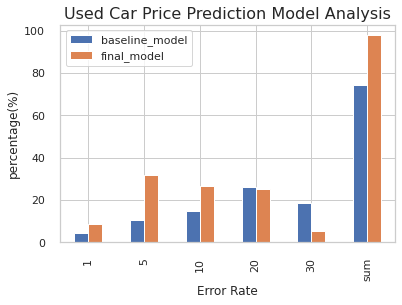

In [70]:
df_analysis.plot.bar()
plt.title('Used Car Price Prediction Model Analysis', fontsize=16)
plt.ylabel('percentage(%)', fontsize=12)
plt.xlabel('Error Rate', fontsize=12)
plt.show()

In [71]:
#For the future
"""
- Model still needs higher accuracy, becuase above 5% error rate is Not good at all. and they are 

"""

'\n- Model still needs higher accuracy, becuase above 5% error rate is Not good at all. and they are \n\n'